In [1]:
import re
import json
import torch
import seaborn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.sans-serif'] = ['DengXian']  
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
with open('glove.6B.50d.txt', 'rb') as f:
    lines = f.readlines()

trained_dict = dict()
for i in range(len(lines)):
    line = lines[i].split()
    trained_dict[line[0].decode("utf-8").lower()] = [float(line[j]) for j in range(1, 51)]

In [3]:
name_lst = ['array', 'hash', 'math', 'string', 'DP', 'greedy', 'sorting', 'DFS']
name_dct = {'array': 0, 'hash-table': 1, 'math': 2, 'string': 3,
            'dynamic-programming': 4, 'greedy': 5, 'sorting': 6, 'depth-first-search': 7, }
path_lst = ['./results/ec_rnn+_valid.json', './results/ec_lstm+_valid.json', './results/ec_att_valid.json',
            './results/ec_base_valid.json', './results/ec_str_valid.json', './results/ec_geo_valid.json',
            './results/ec_pre_valid.json', './results/ec+kt+mtl_valid_ec.json', './results/ec+kt+e2e_valid_ec.json', ]
ttl_lst0 = ['rnn+', 'lstm+', 'att', 'base', 'str', 'geo', 'pre', 'mtl', 'e2e', ]
ttl_lst1 = ['RNN+', 'LSTM+', 'self-attention', 'EC base', 'EC+str', 'EC+geo',
            'EC+KT-pre', 'EC+KT+mtl', 'EC+KT+e2e', ]
ttl_lst2 = ['(a) RNN+', '(b) LSTM+', '(c) self-attention', '(d) EC base', '(e) EC+str', '(f) EC+geo',
            '(g) EC+KT-pre', '(h) EC+KT+mtl', '(i) EC+KT+e2e', ]

In [4]:
dist_lst = []

with open('./problem_data_a.json', 'r', encoding='utf8') as dist:
    dist = json.load(dist)
data = []
for prob in dist:
    term = dict()
    term['class'] = [0] * 8
    for tag in prob['topicTags']:
        term['class'][name_dct[tag]] = 1
    term['content'] = prob['content']
    data.append(term)

In [5]:
def get_type_lst(dict_lst):
    type_lst = [0] * 8
    exer_lst = [0] * 8
    word_dct = {'unknown': {'tot': 0, 'num': [0] * 8}, }
    for item in dict_lst:
        s = item['content'].lower()
        words = s.split()
        for word in words:
            if word not in word_dct:
                if word in trained_dict:
                    word_dct[word] = {'tot': 1, 'num': item['class']}
                else:
                    temp = np.array(word_dct['unknown']['num']) + np.array(item['class'])
                    word_dct['unknown']['num'] = temp.tolist()
                    word_dct['unknown']['tot'] += 1
            else:
                temp = np.array(word_dct[word]['num']) + np.array(item['class'])
                word_dct[word]['num'] = temp.tolist()
                word_dct[word]['tot'] += 1
            type_lst = np.array(type_lst) + np.array(item['class'])
            type_lst = type_lst.tolist()
        exer_lst = np.array(exer_lst) + np.array(item['class'])
        exer_lst = exer_lst.tolist()
    return type_lst, word_dct, exer_lst


type_glo, word_glo, exer_glo = get_type_lst(data)

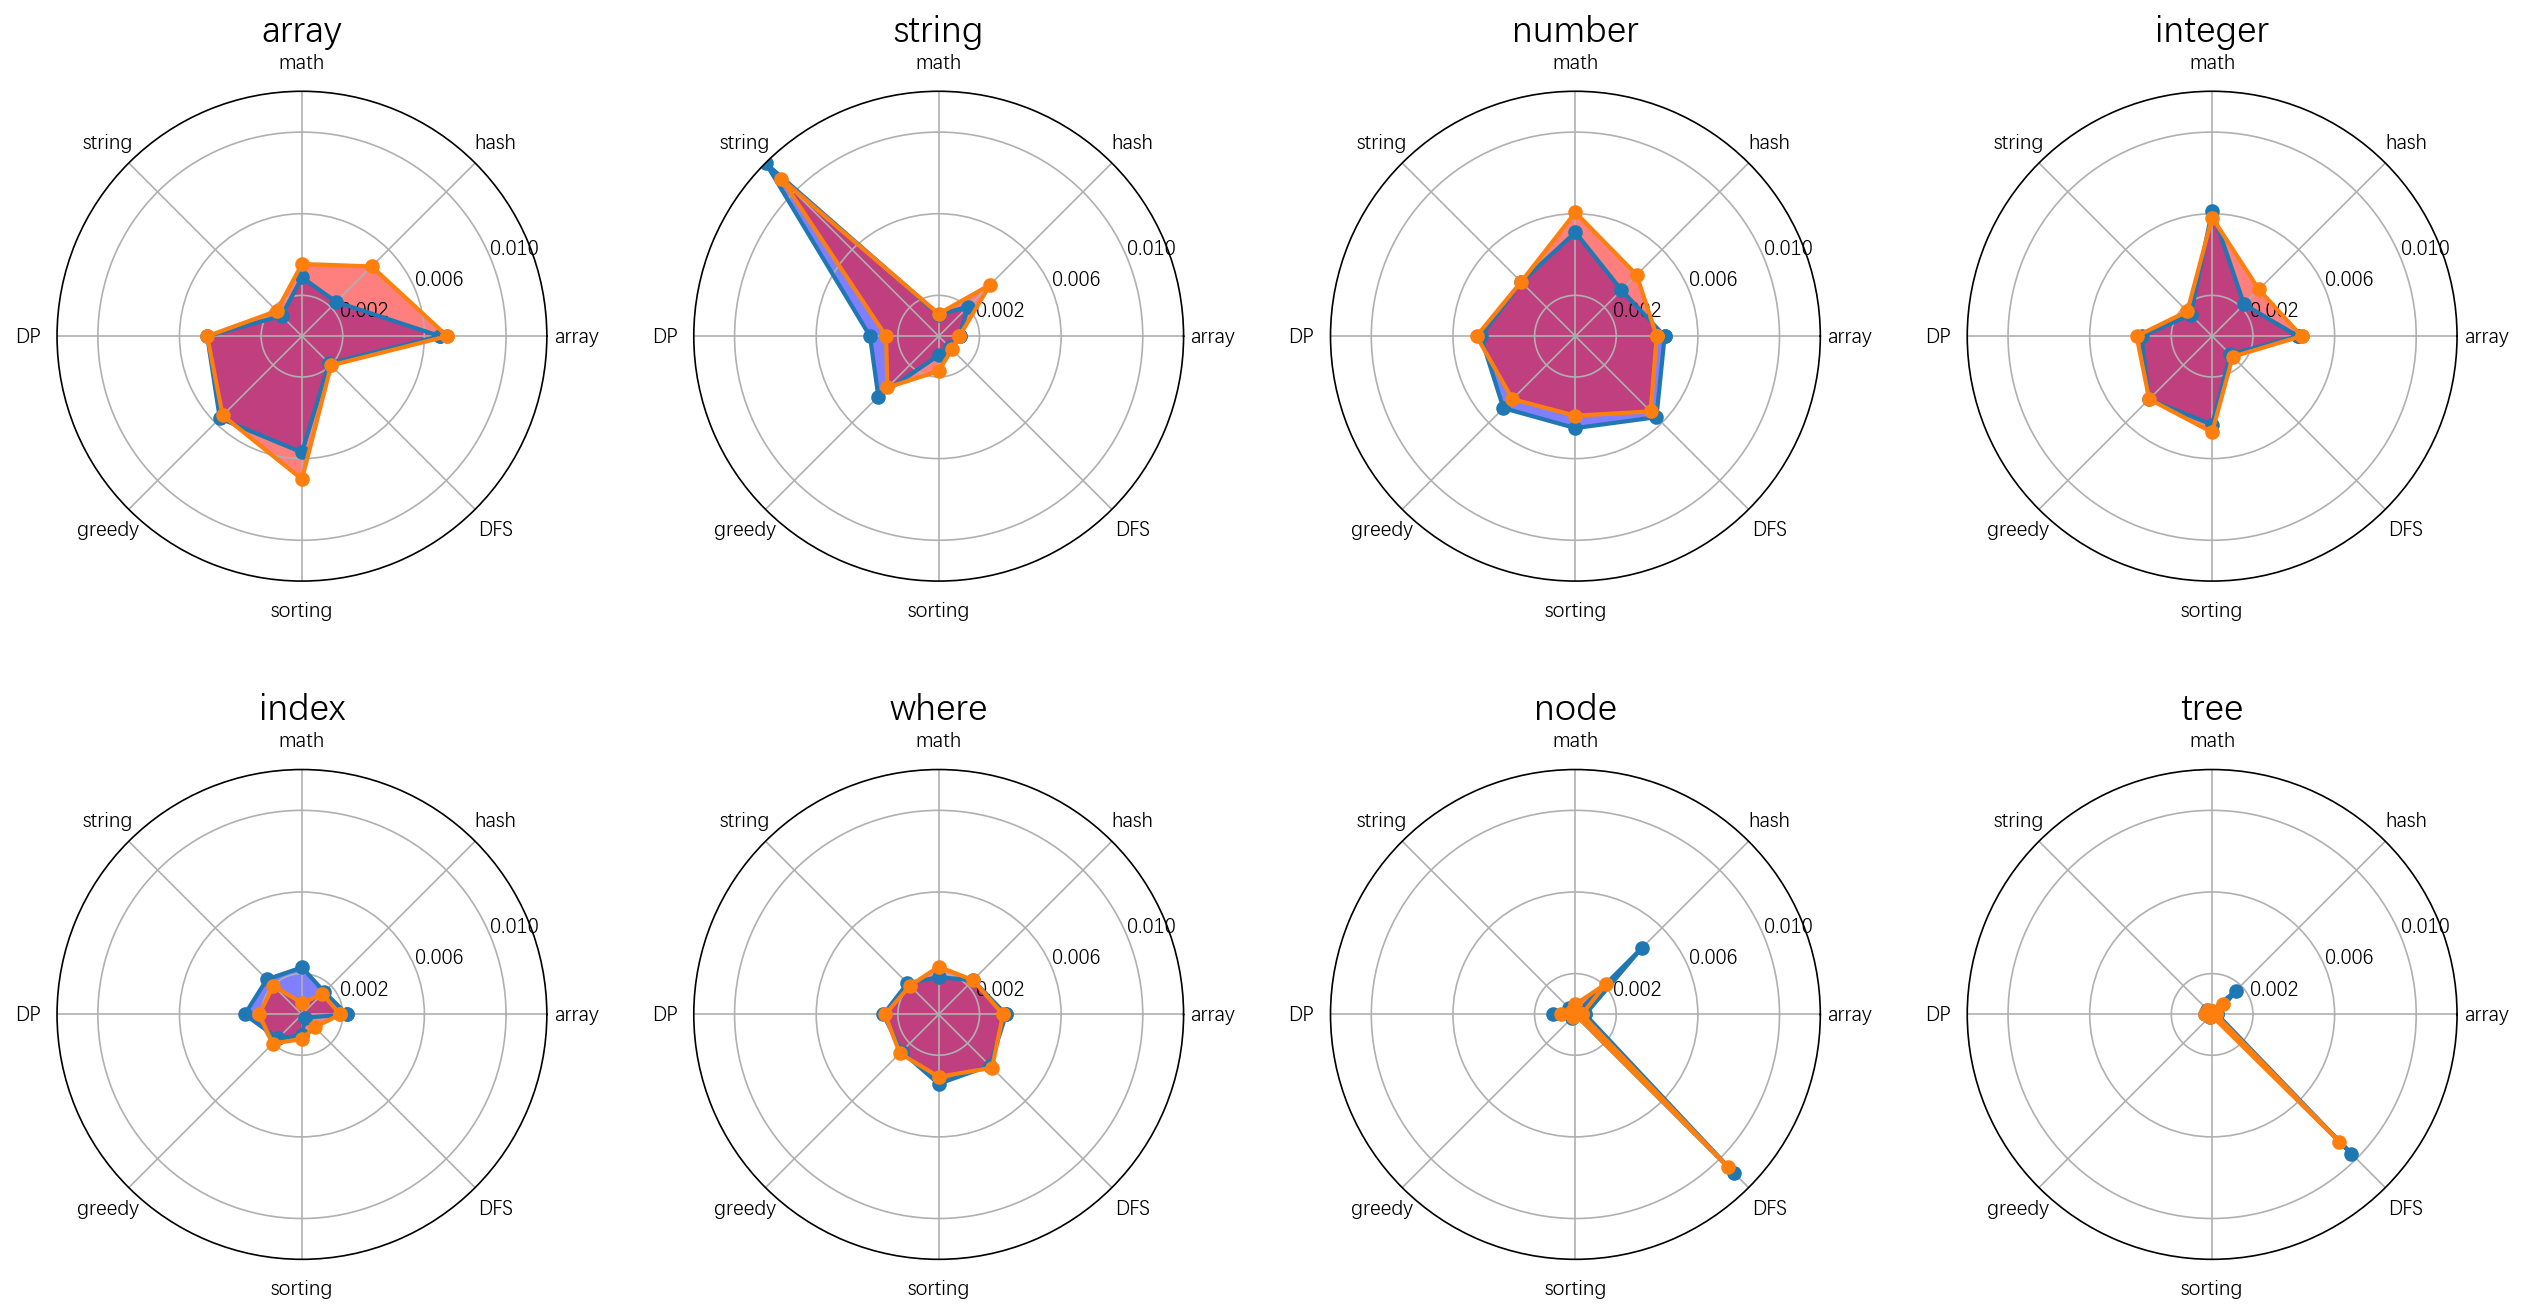

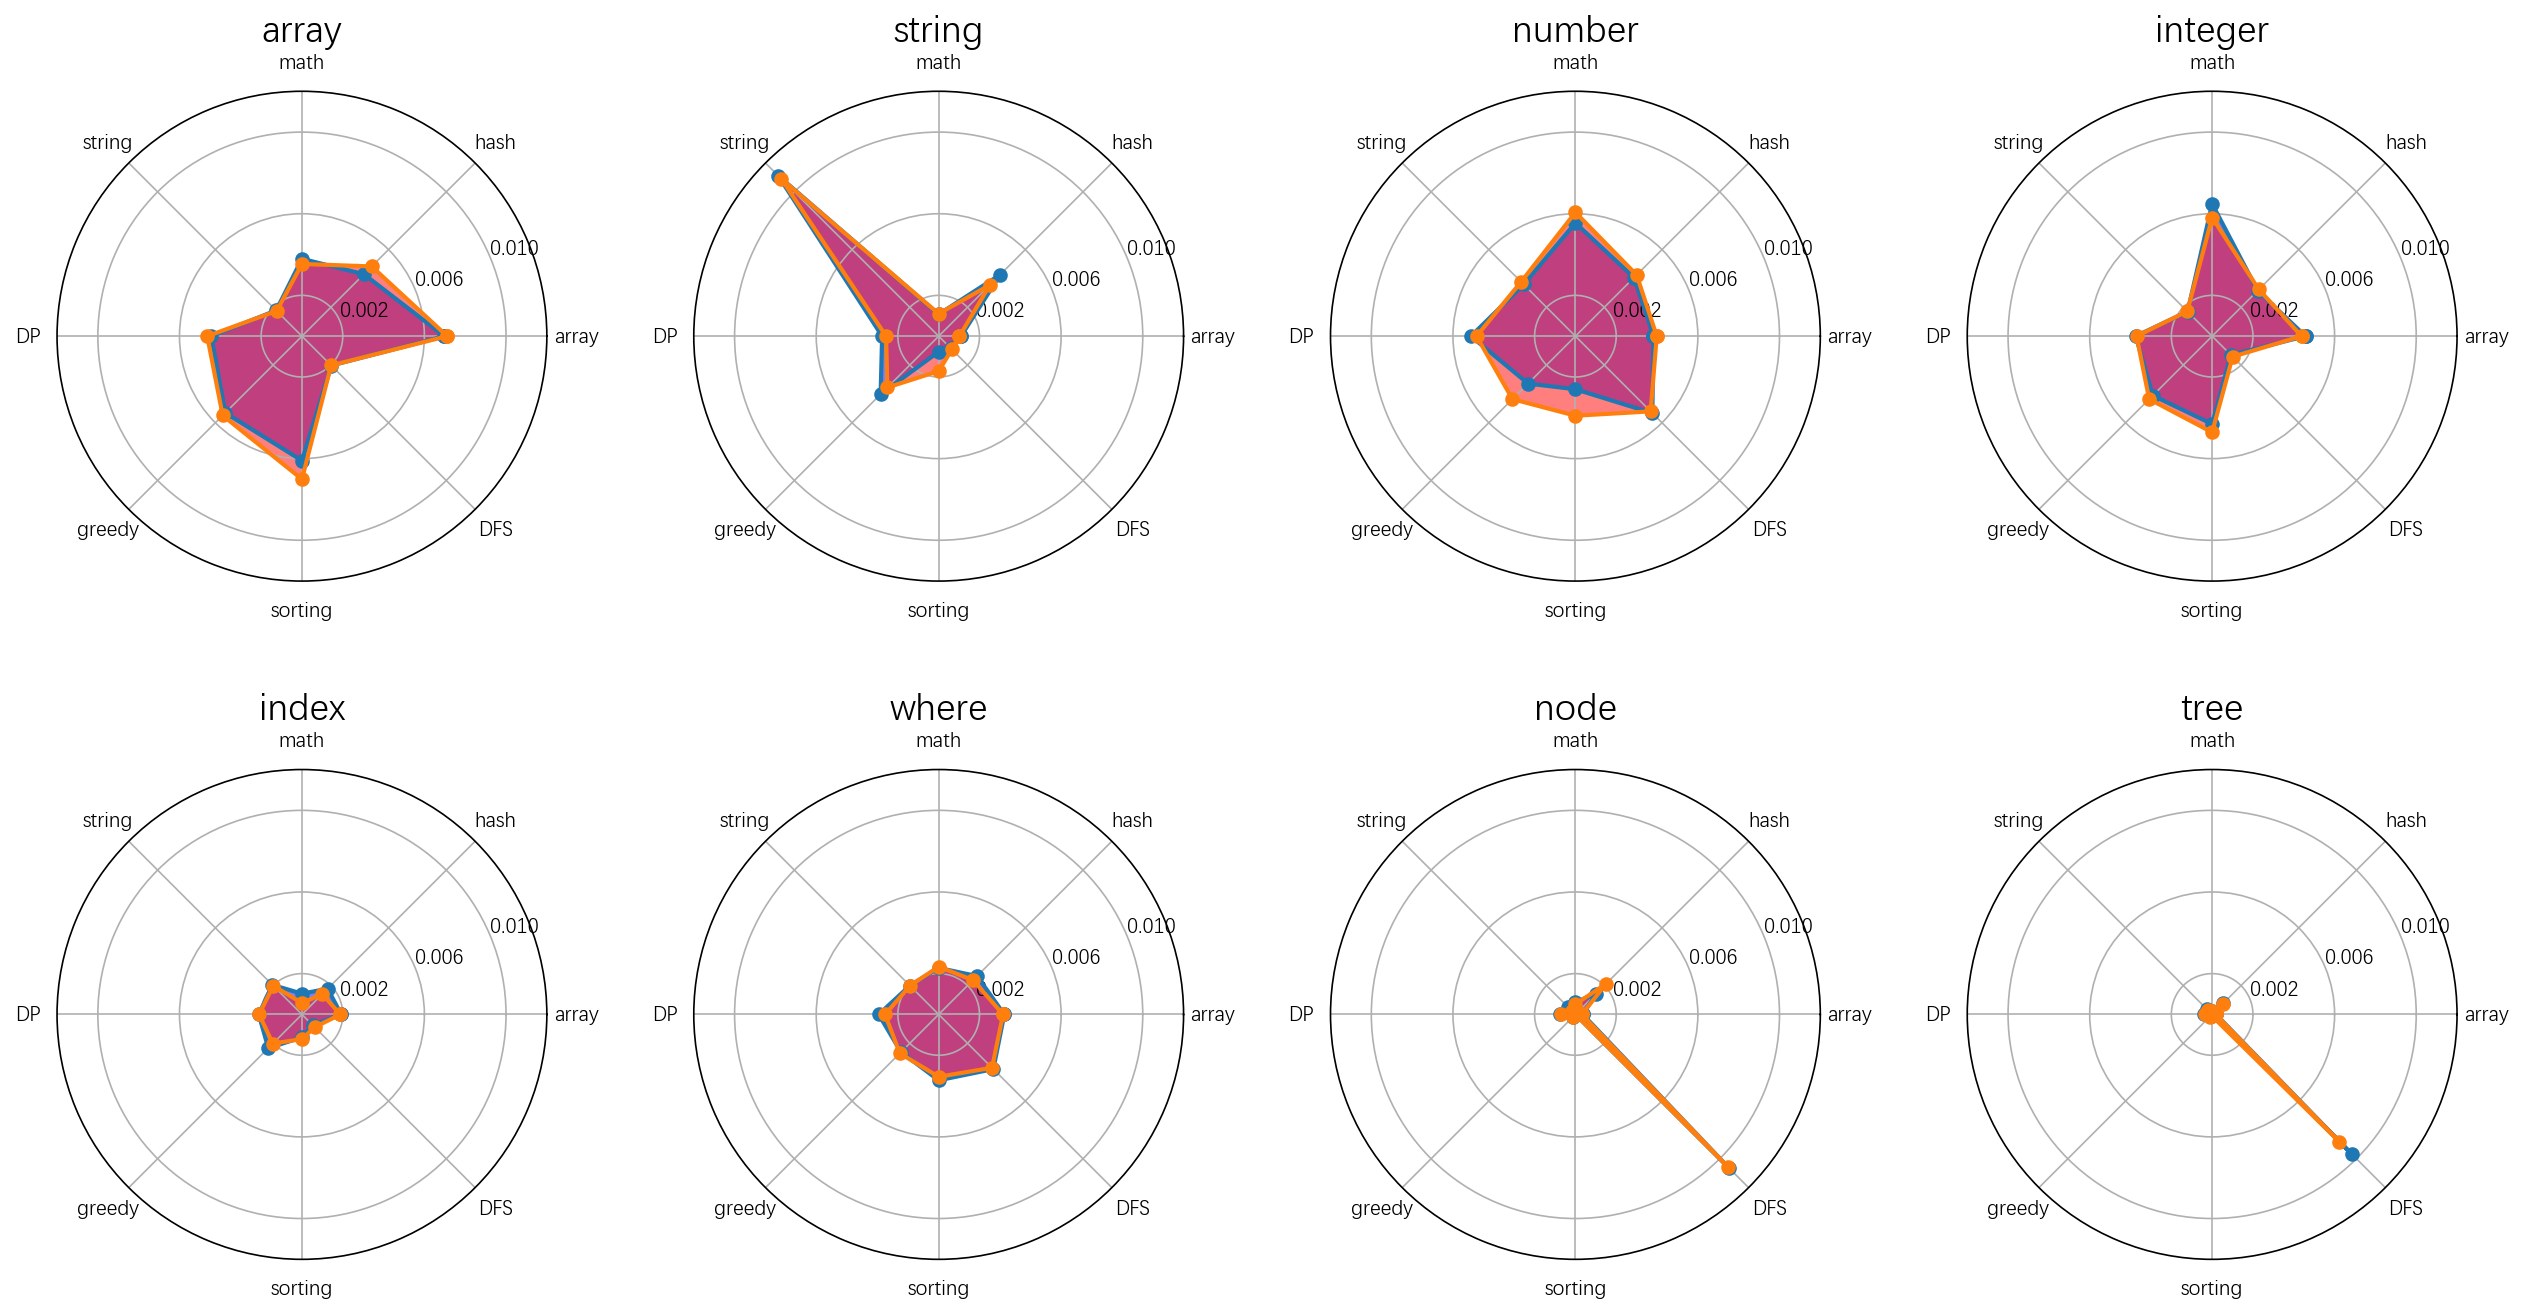

d:\pycharmprojects\ecnu-eduktm\venv\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
d:\pycharmprojects\ecnu-eduktm\venv\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
d:\pycharmprojects\ecnu-eduktm\venv\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
d:\pycharmprojects\ecnu-eduktm\venv\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
d:\pycharmprojects\ecnu-eduktm\venv\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
d:\pycharmprojects\ecnu-eduktm\venv\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
d:\pycharm

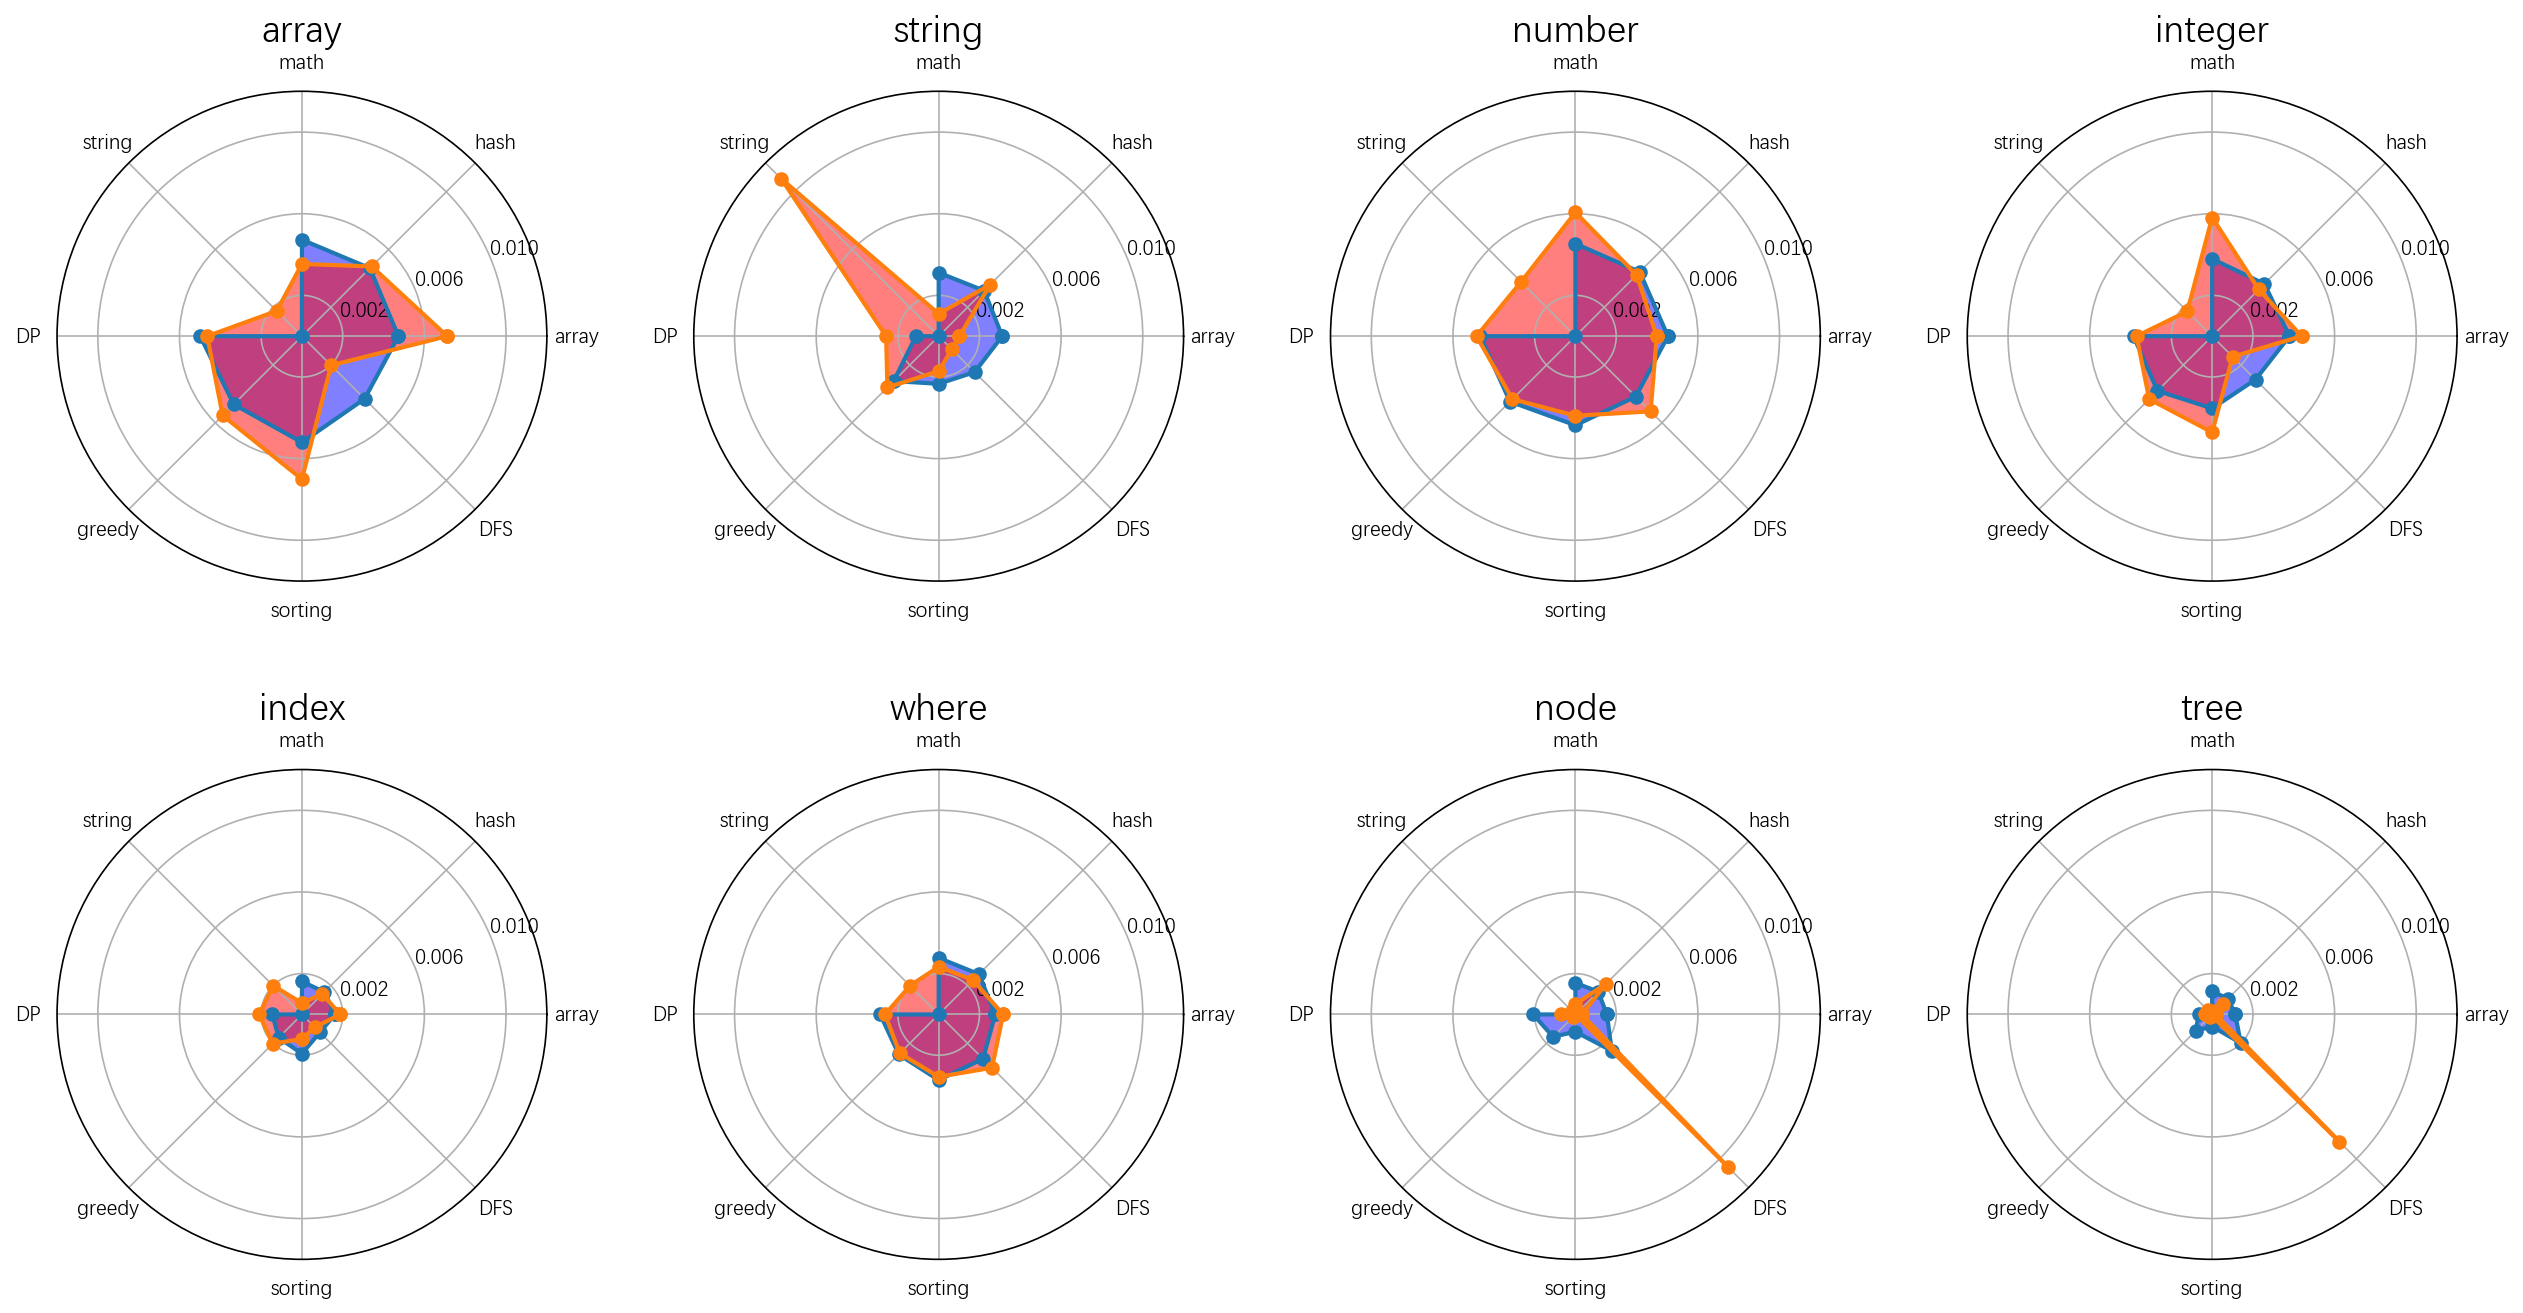

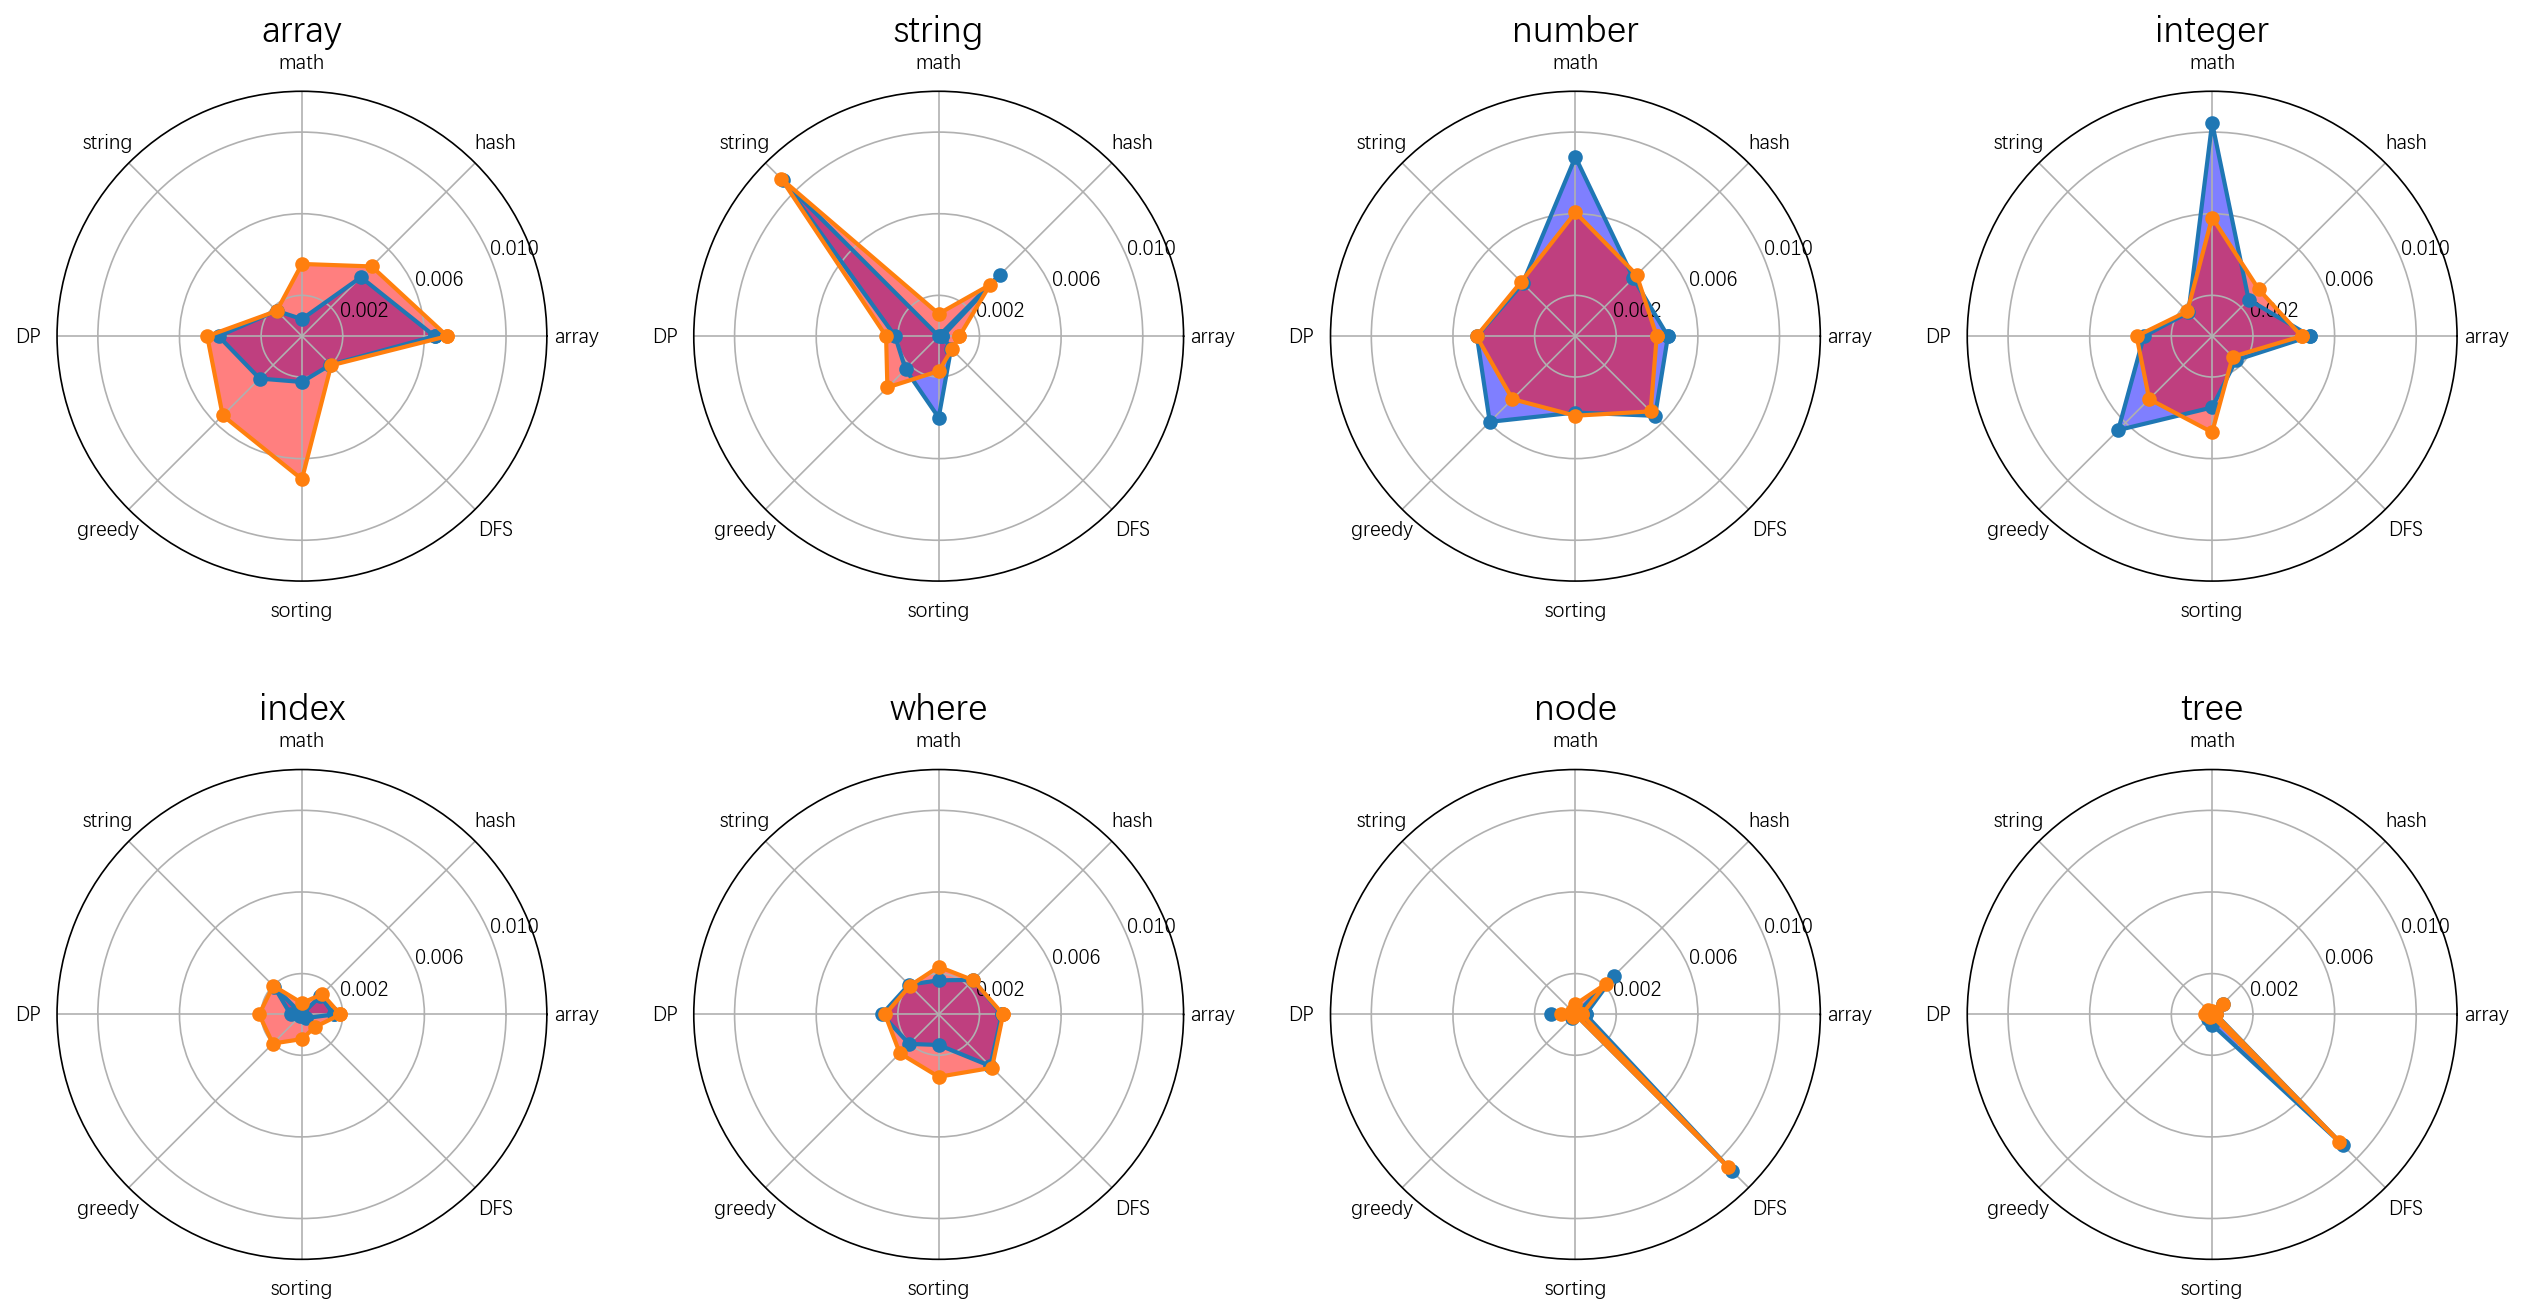

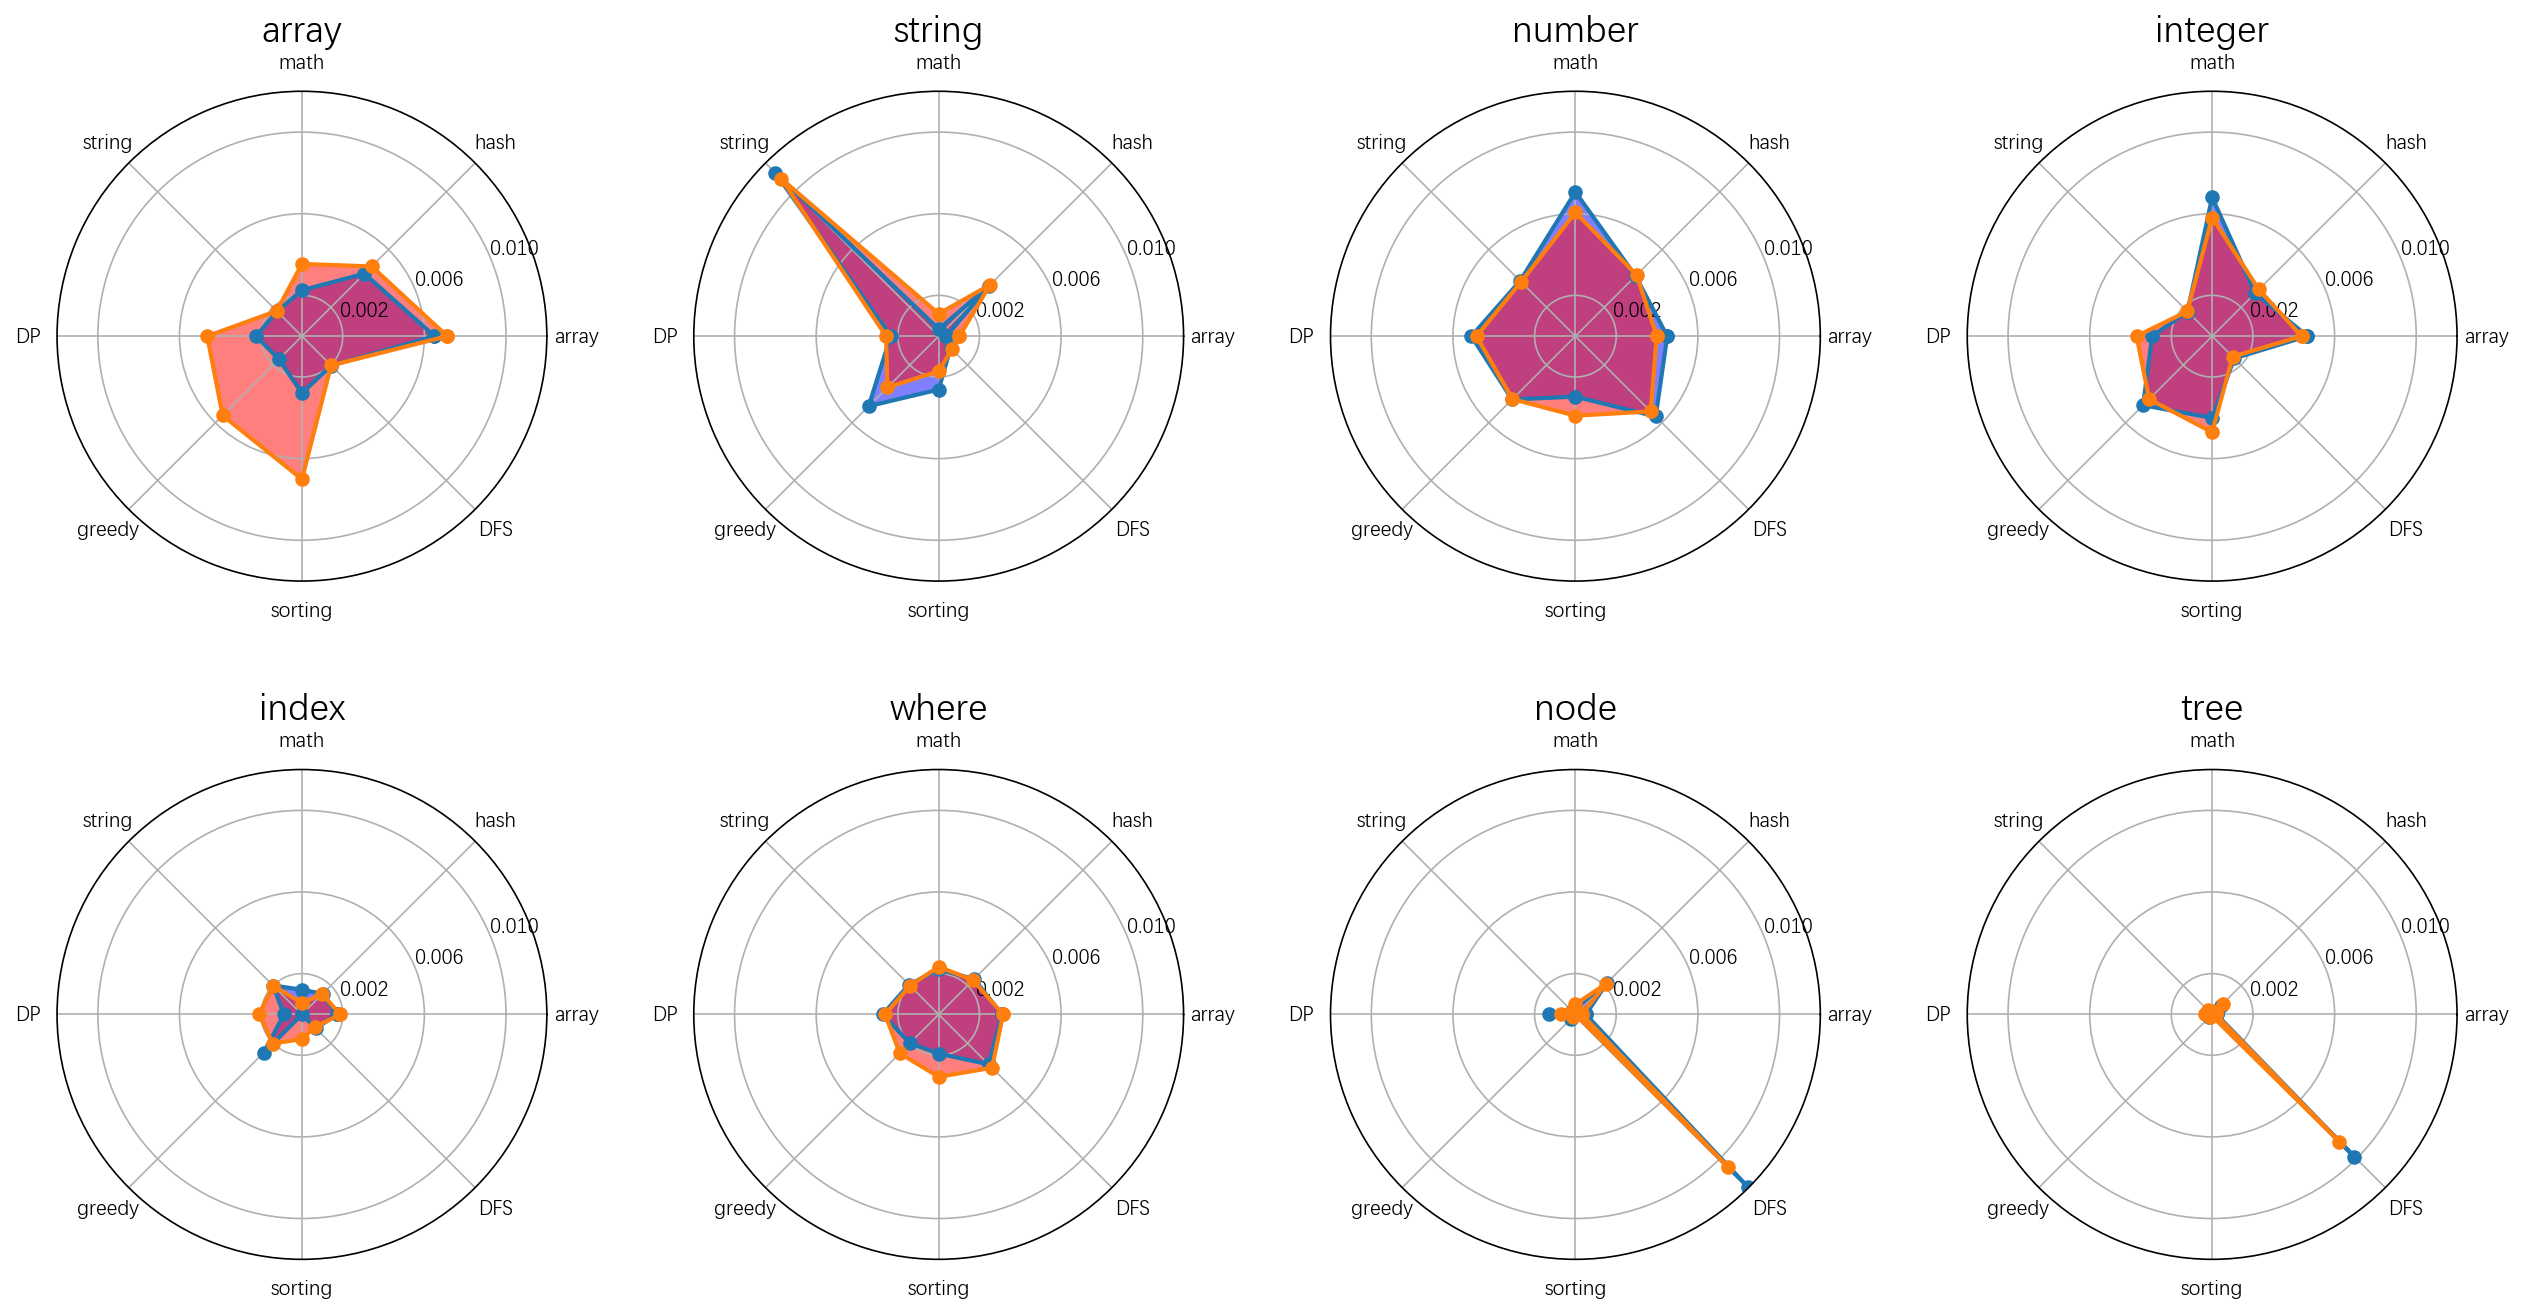

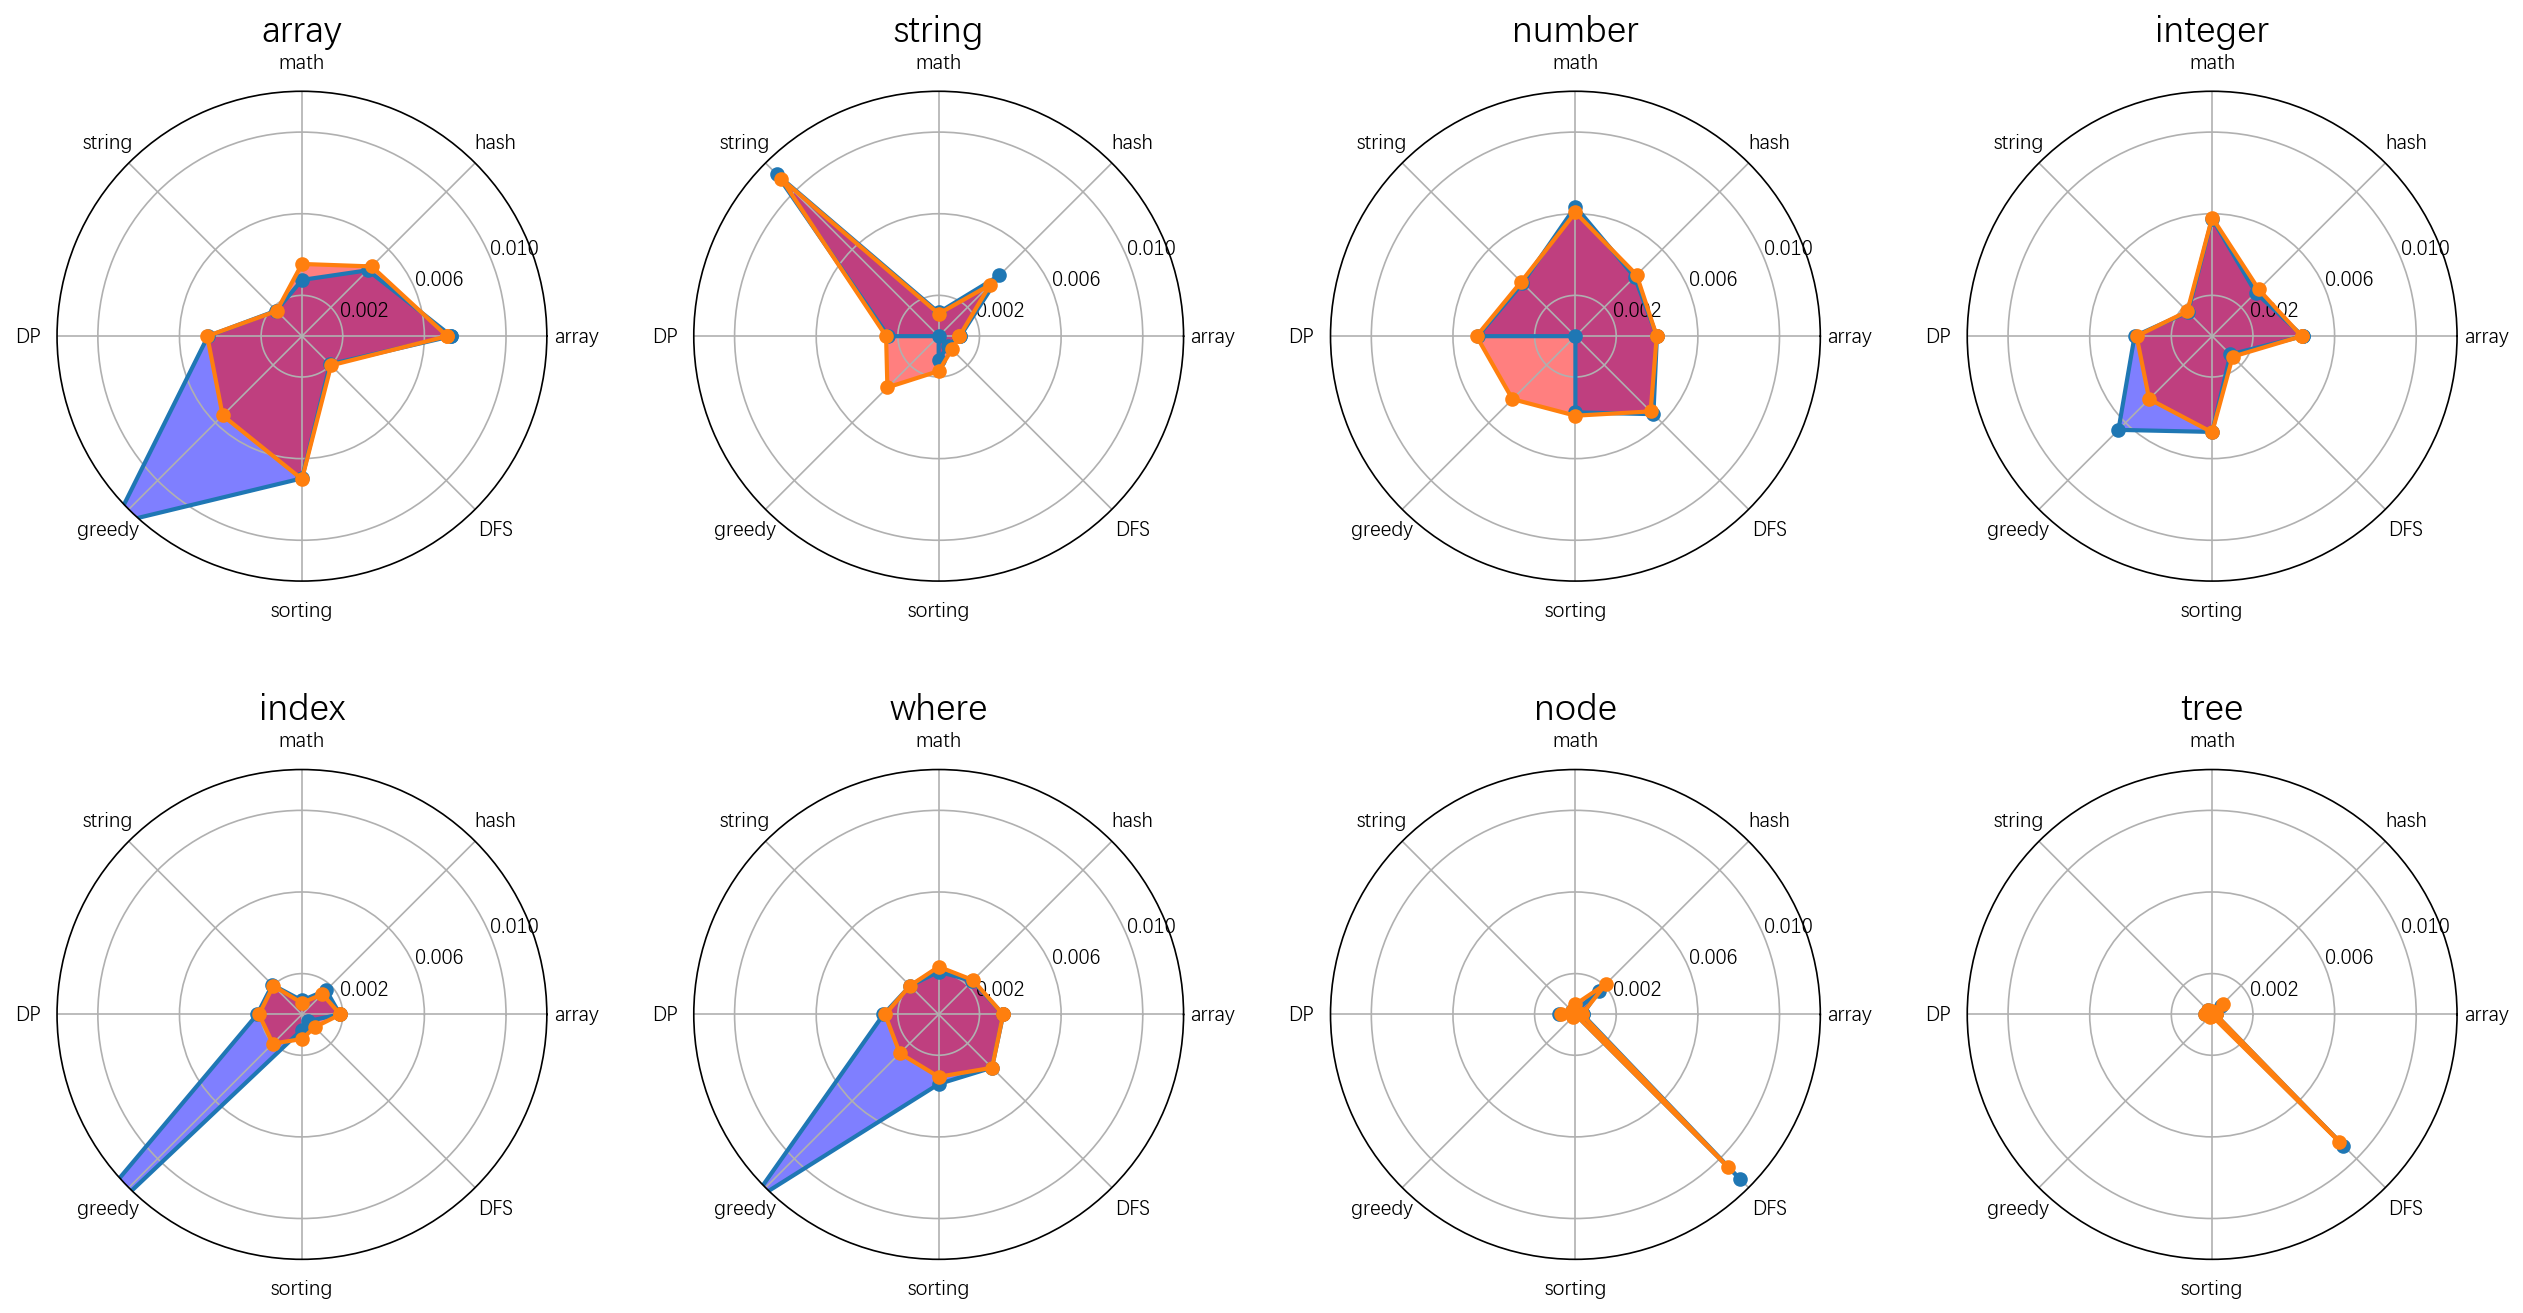

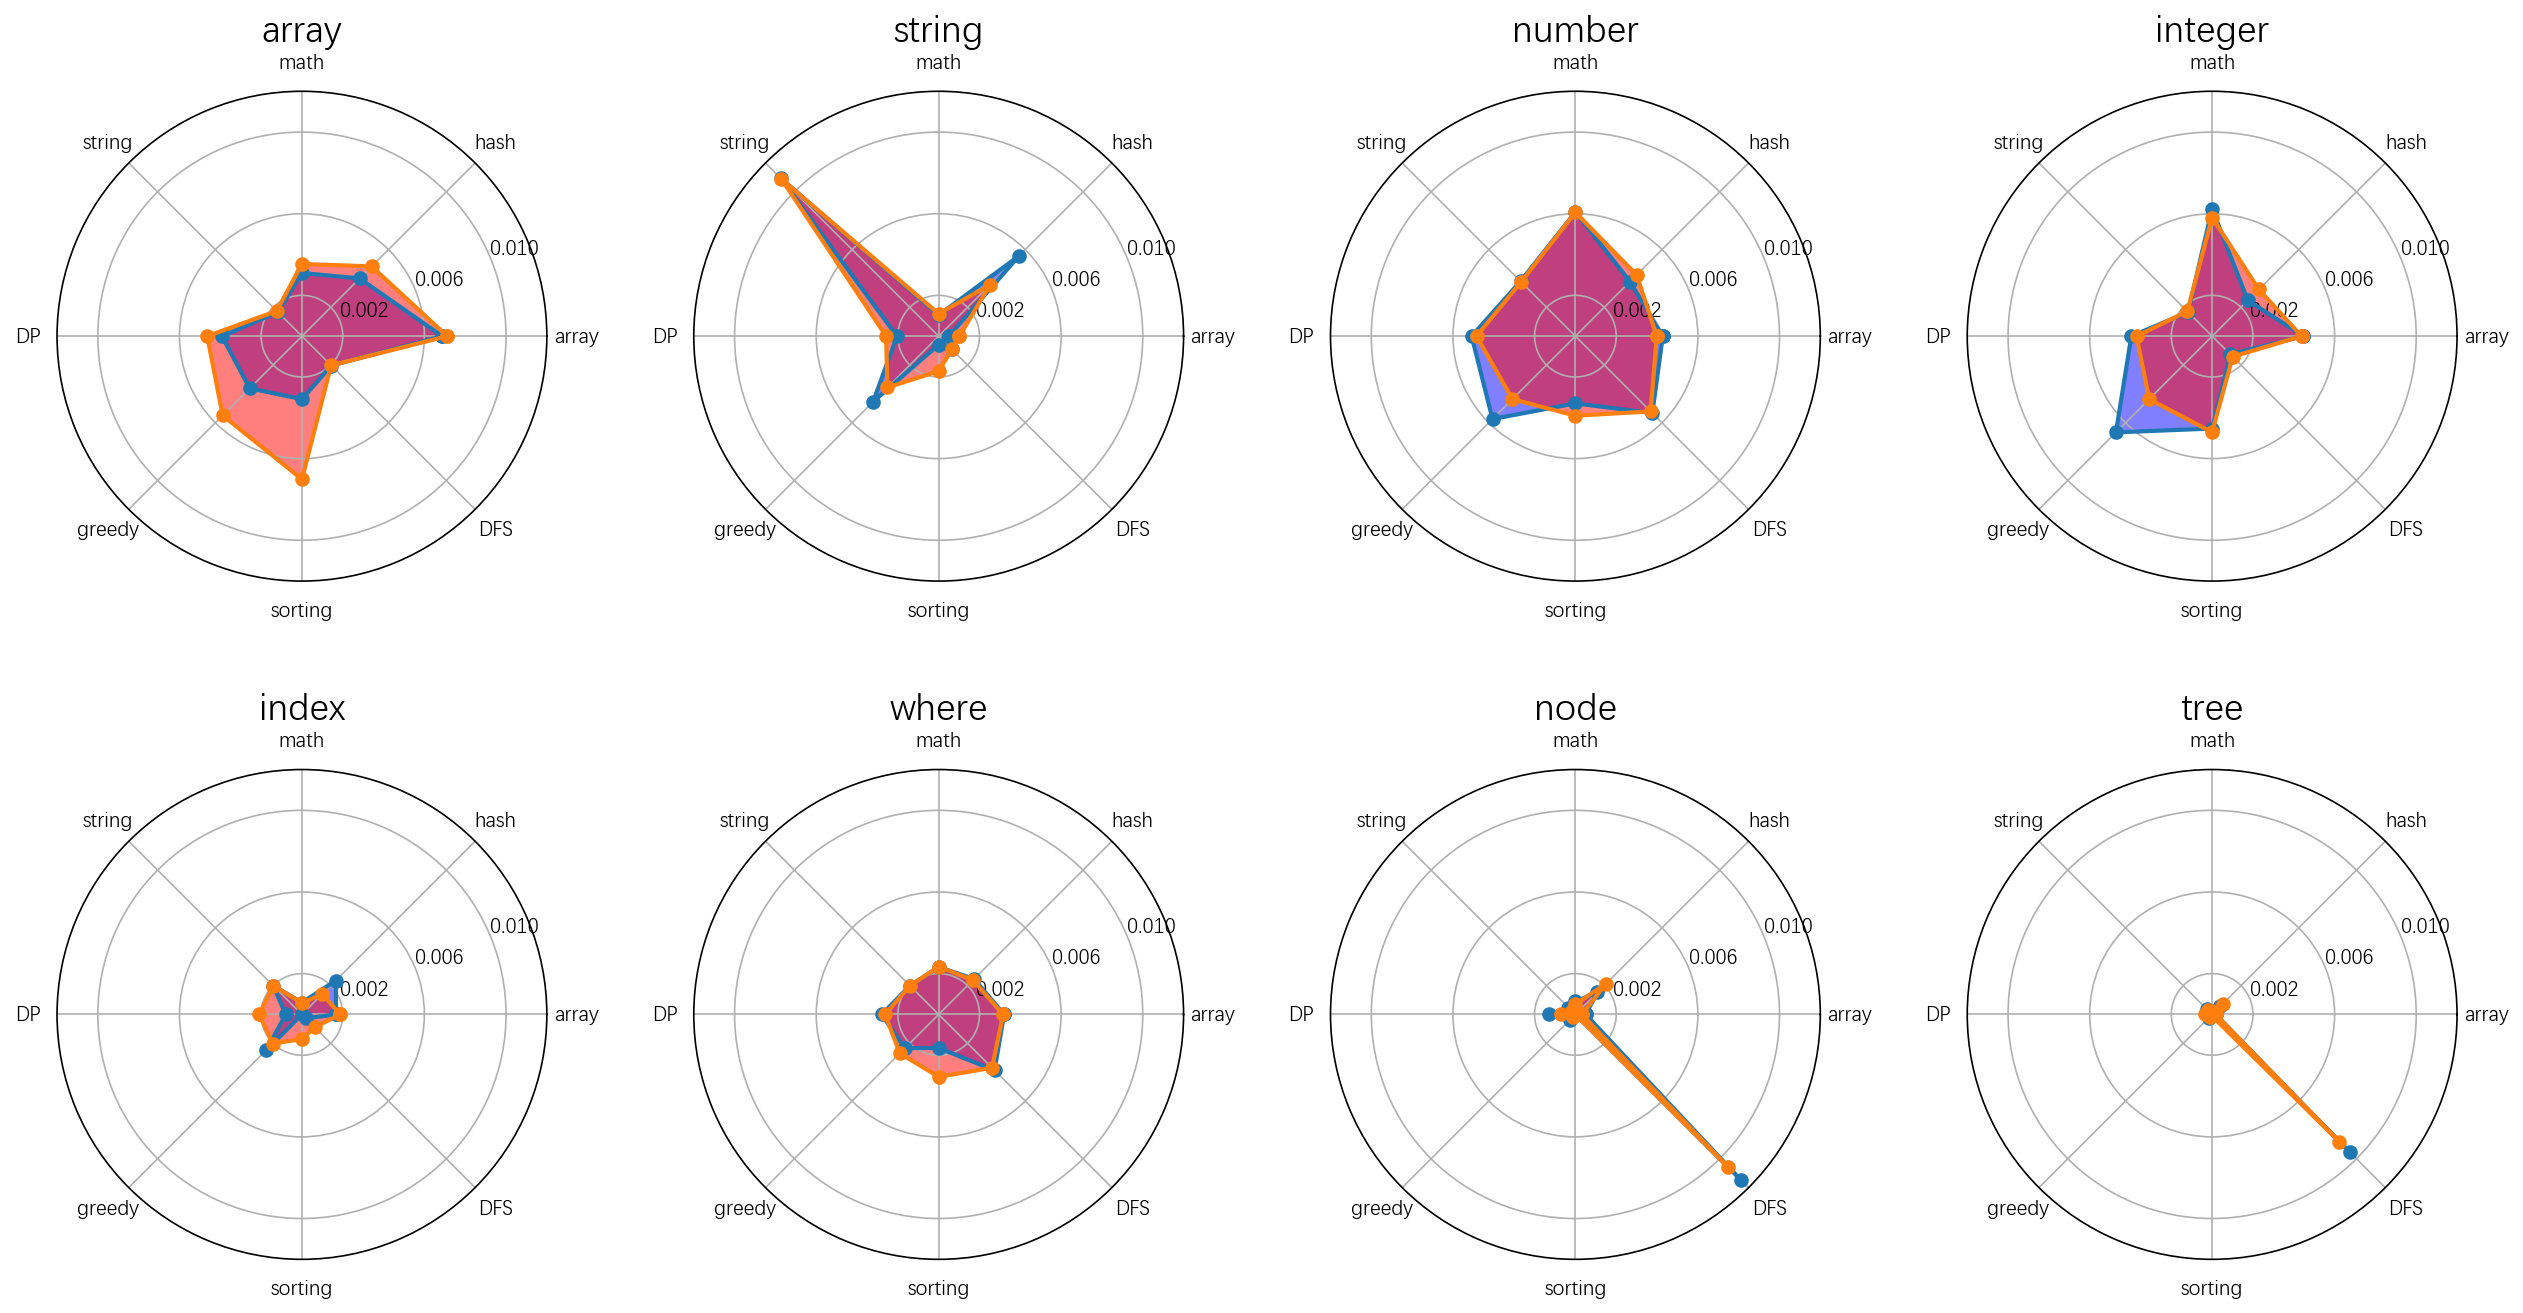

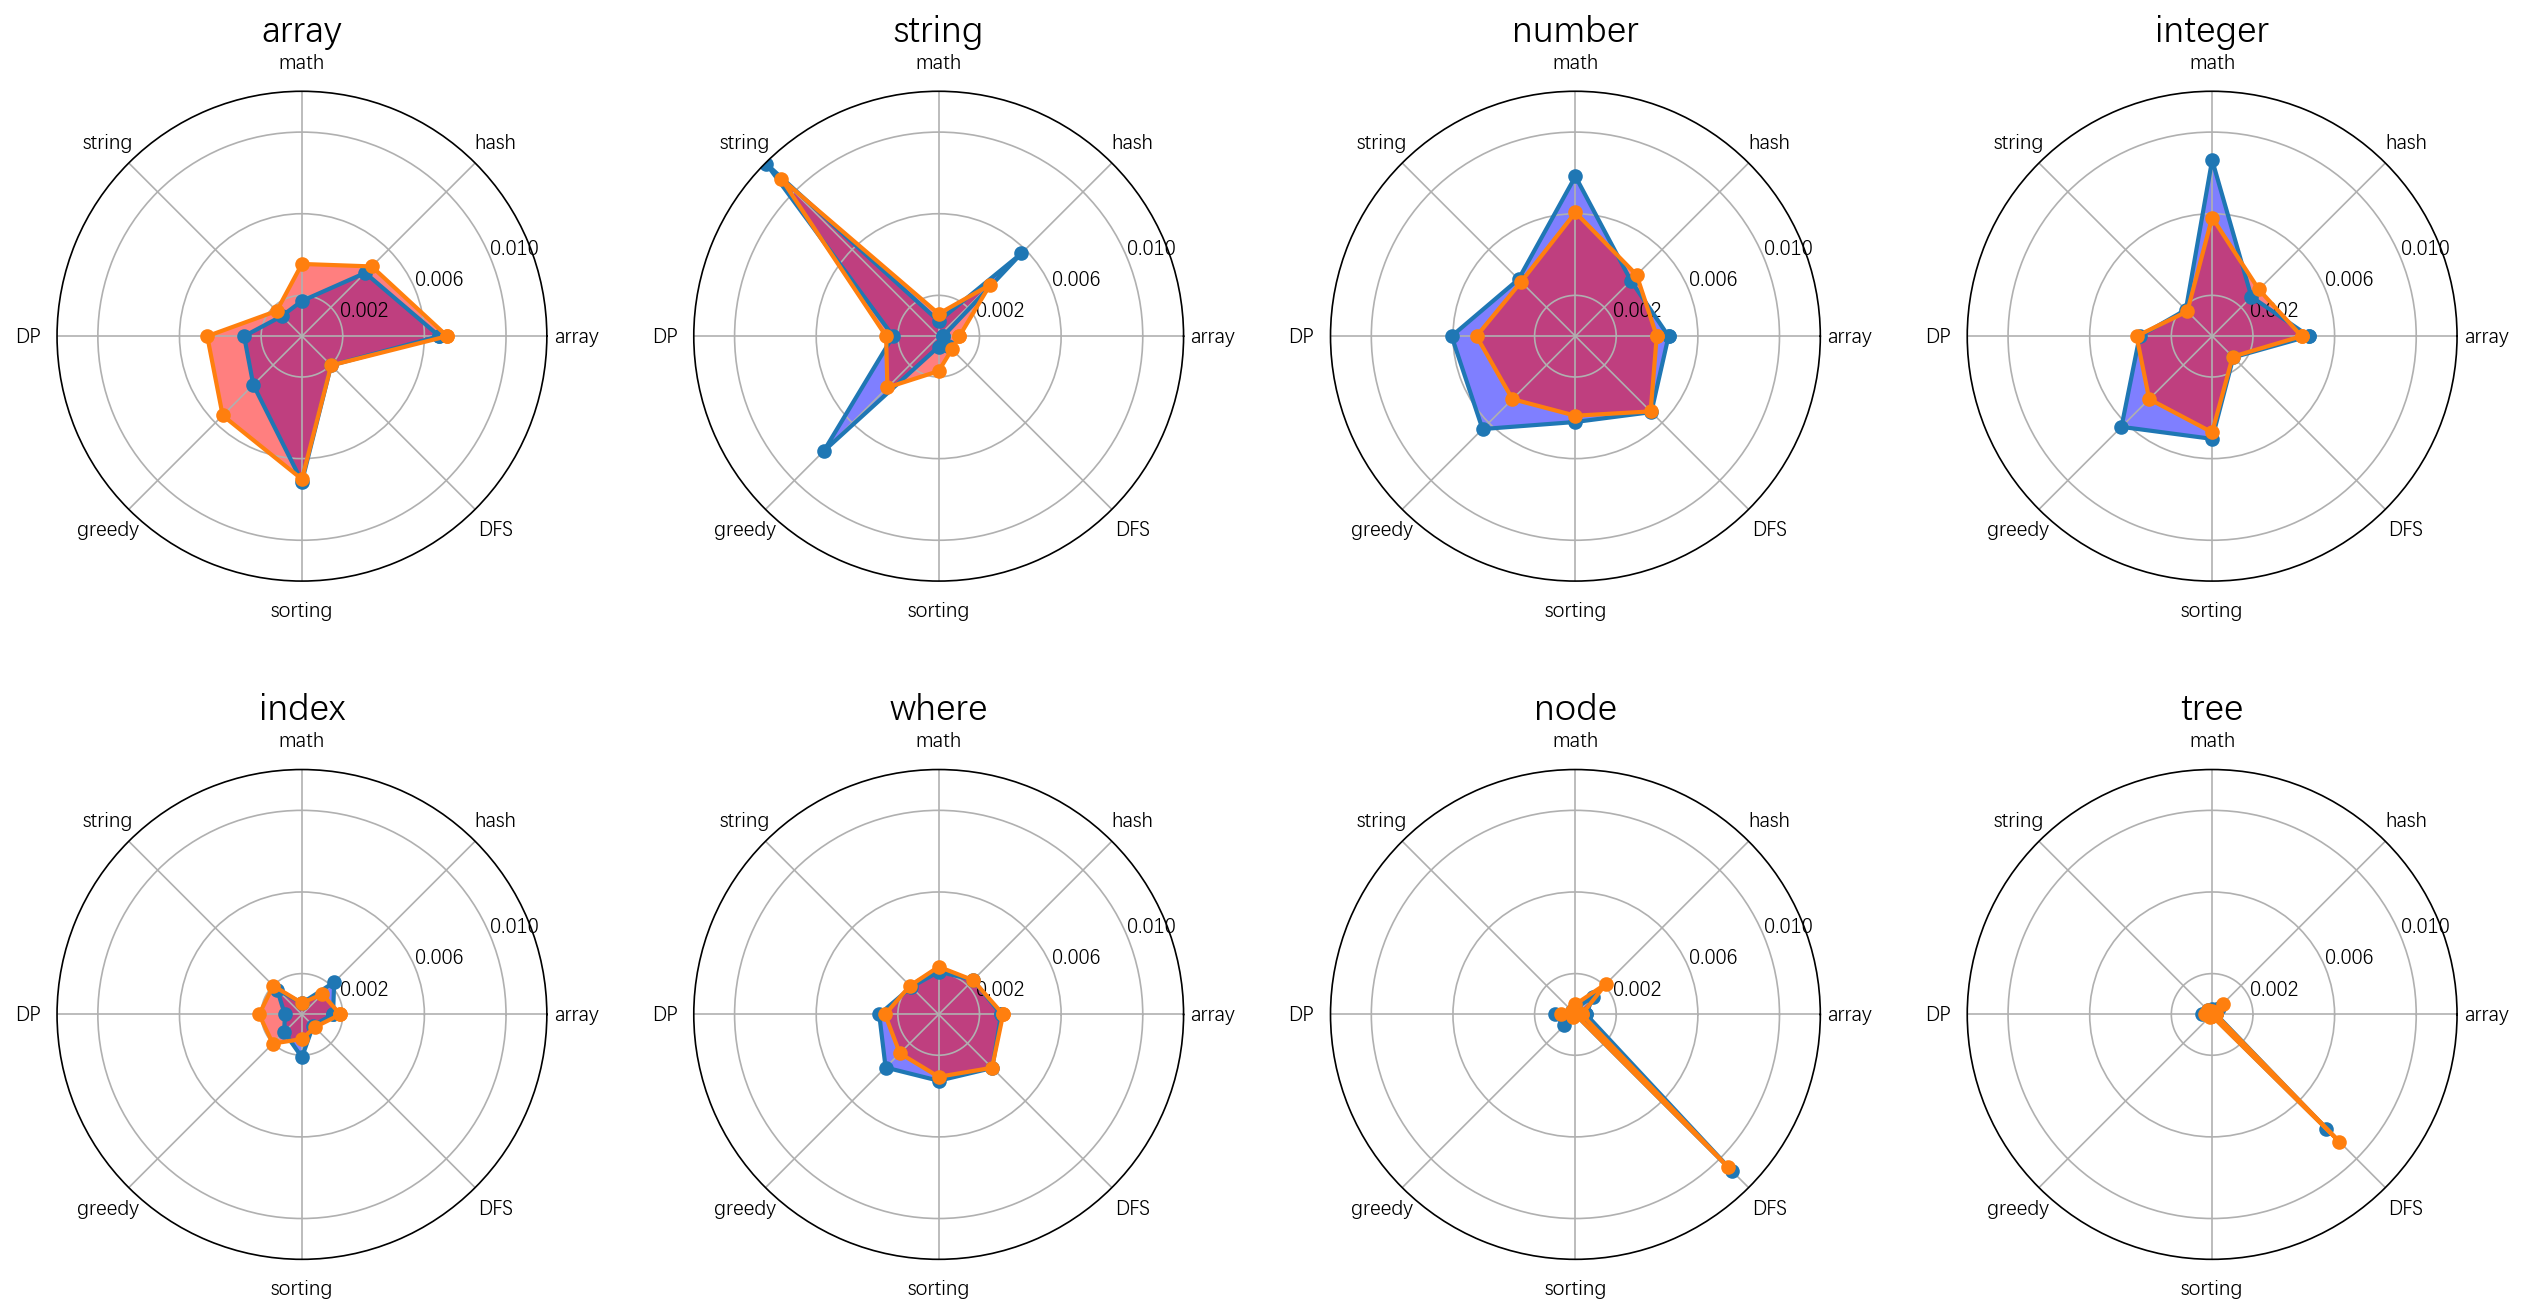

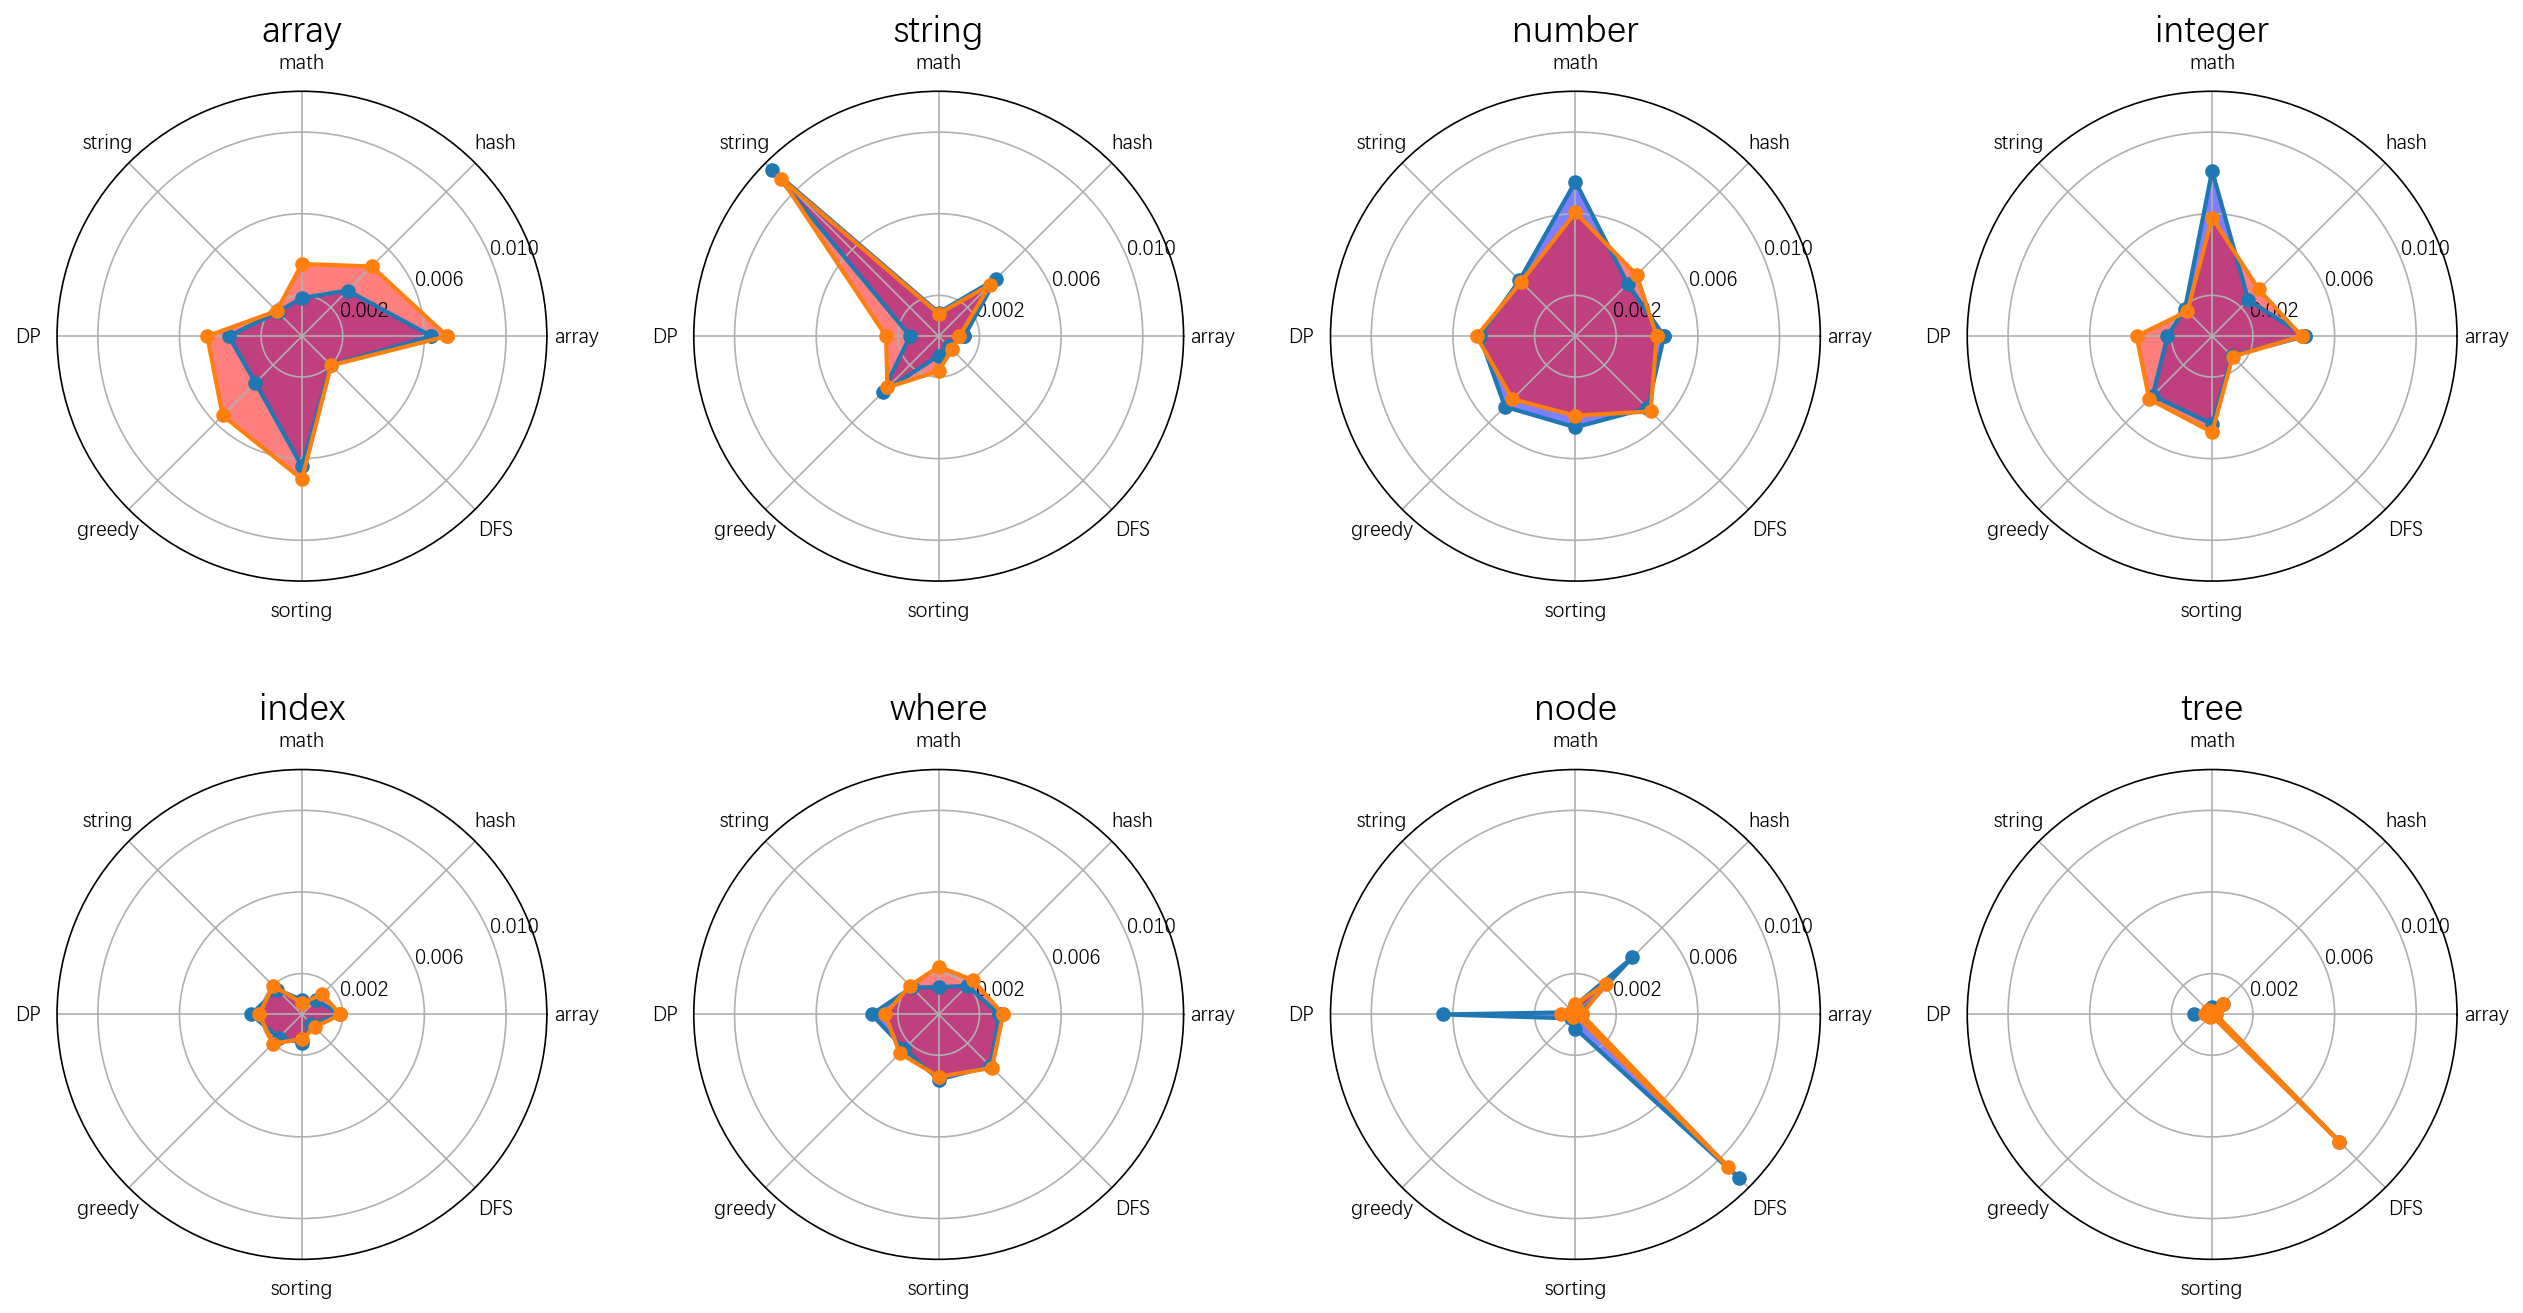

In [6]:
for k, path in enumerate(path_lst):

    with open(path, 'r', encoding='utf8') as dist:
        dist = json.load(dist)
    type_val, word_val, exer_val = get_type_lst(dist)
    dist_lst.append(exer_val)

    fig = plt.figure(num=1, figsize=(20, 10), dpi=150, clear=True)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, hspace=0.3, wspace=0.3)
    angles = np.linspace(0, 2 * np.pi, 9, endpoint=True)
    exe_list = ['array', 'string', 'number', 'integer', 'index', 'where', 'node', 'tree']

    for i in range(8):
        axe = fig.add_subplot(2, 4, i + 1, polar=True)

        val = np.array(word_val[exe_list[i]]['num']) / np.array(type_val)
        val[np.isnan(val)] = 0
        val[np.isinf(val)] = 0
        val = val.tolist()
        val.append(val[0])
        axe.plot(angles, val, 'o-', linewidth=2)
        axe.fill(angles, val, 'b', alpha=0.5)

        val = np.array(word_glo[exe_list[i]]['num']) / np.array(type_glo)
        val[np.isnan(val)] = 0
        val[np.isinf(val)] = 0
        val = val.tolist()
        val.append(val[0])
        axe.plot(angles, val, 'o-', linewidth=2)
        axe.fill(angles, val, 'r', alpha=0.5)

        axe.set_thetagrids(angles[:-1] * 180 / np.pi, name_lst)
        axe.set_title(exe_list[i], fontsize=18)
        axe.set_yticks([0.002, 0.006, 0.01])
        axe.set_ylim(0, 0.012)

    plt.savefig('./results/cmp_ec/cmp_ec_radar_%s.jpg' % ttl_lst0[k])
    plt.show()

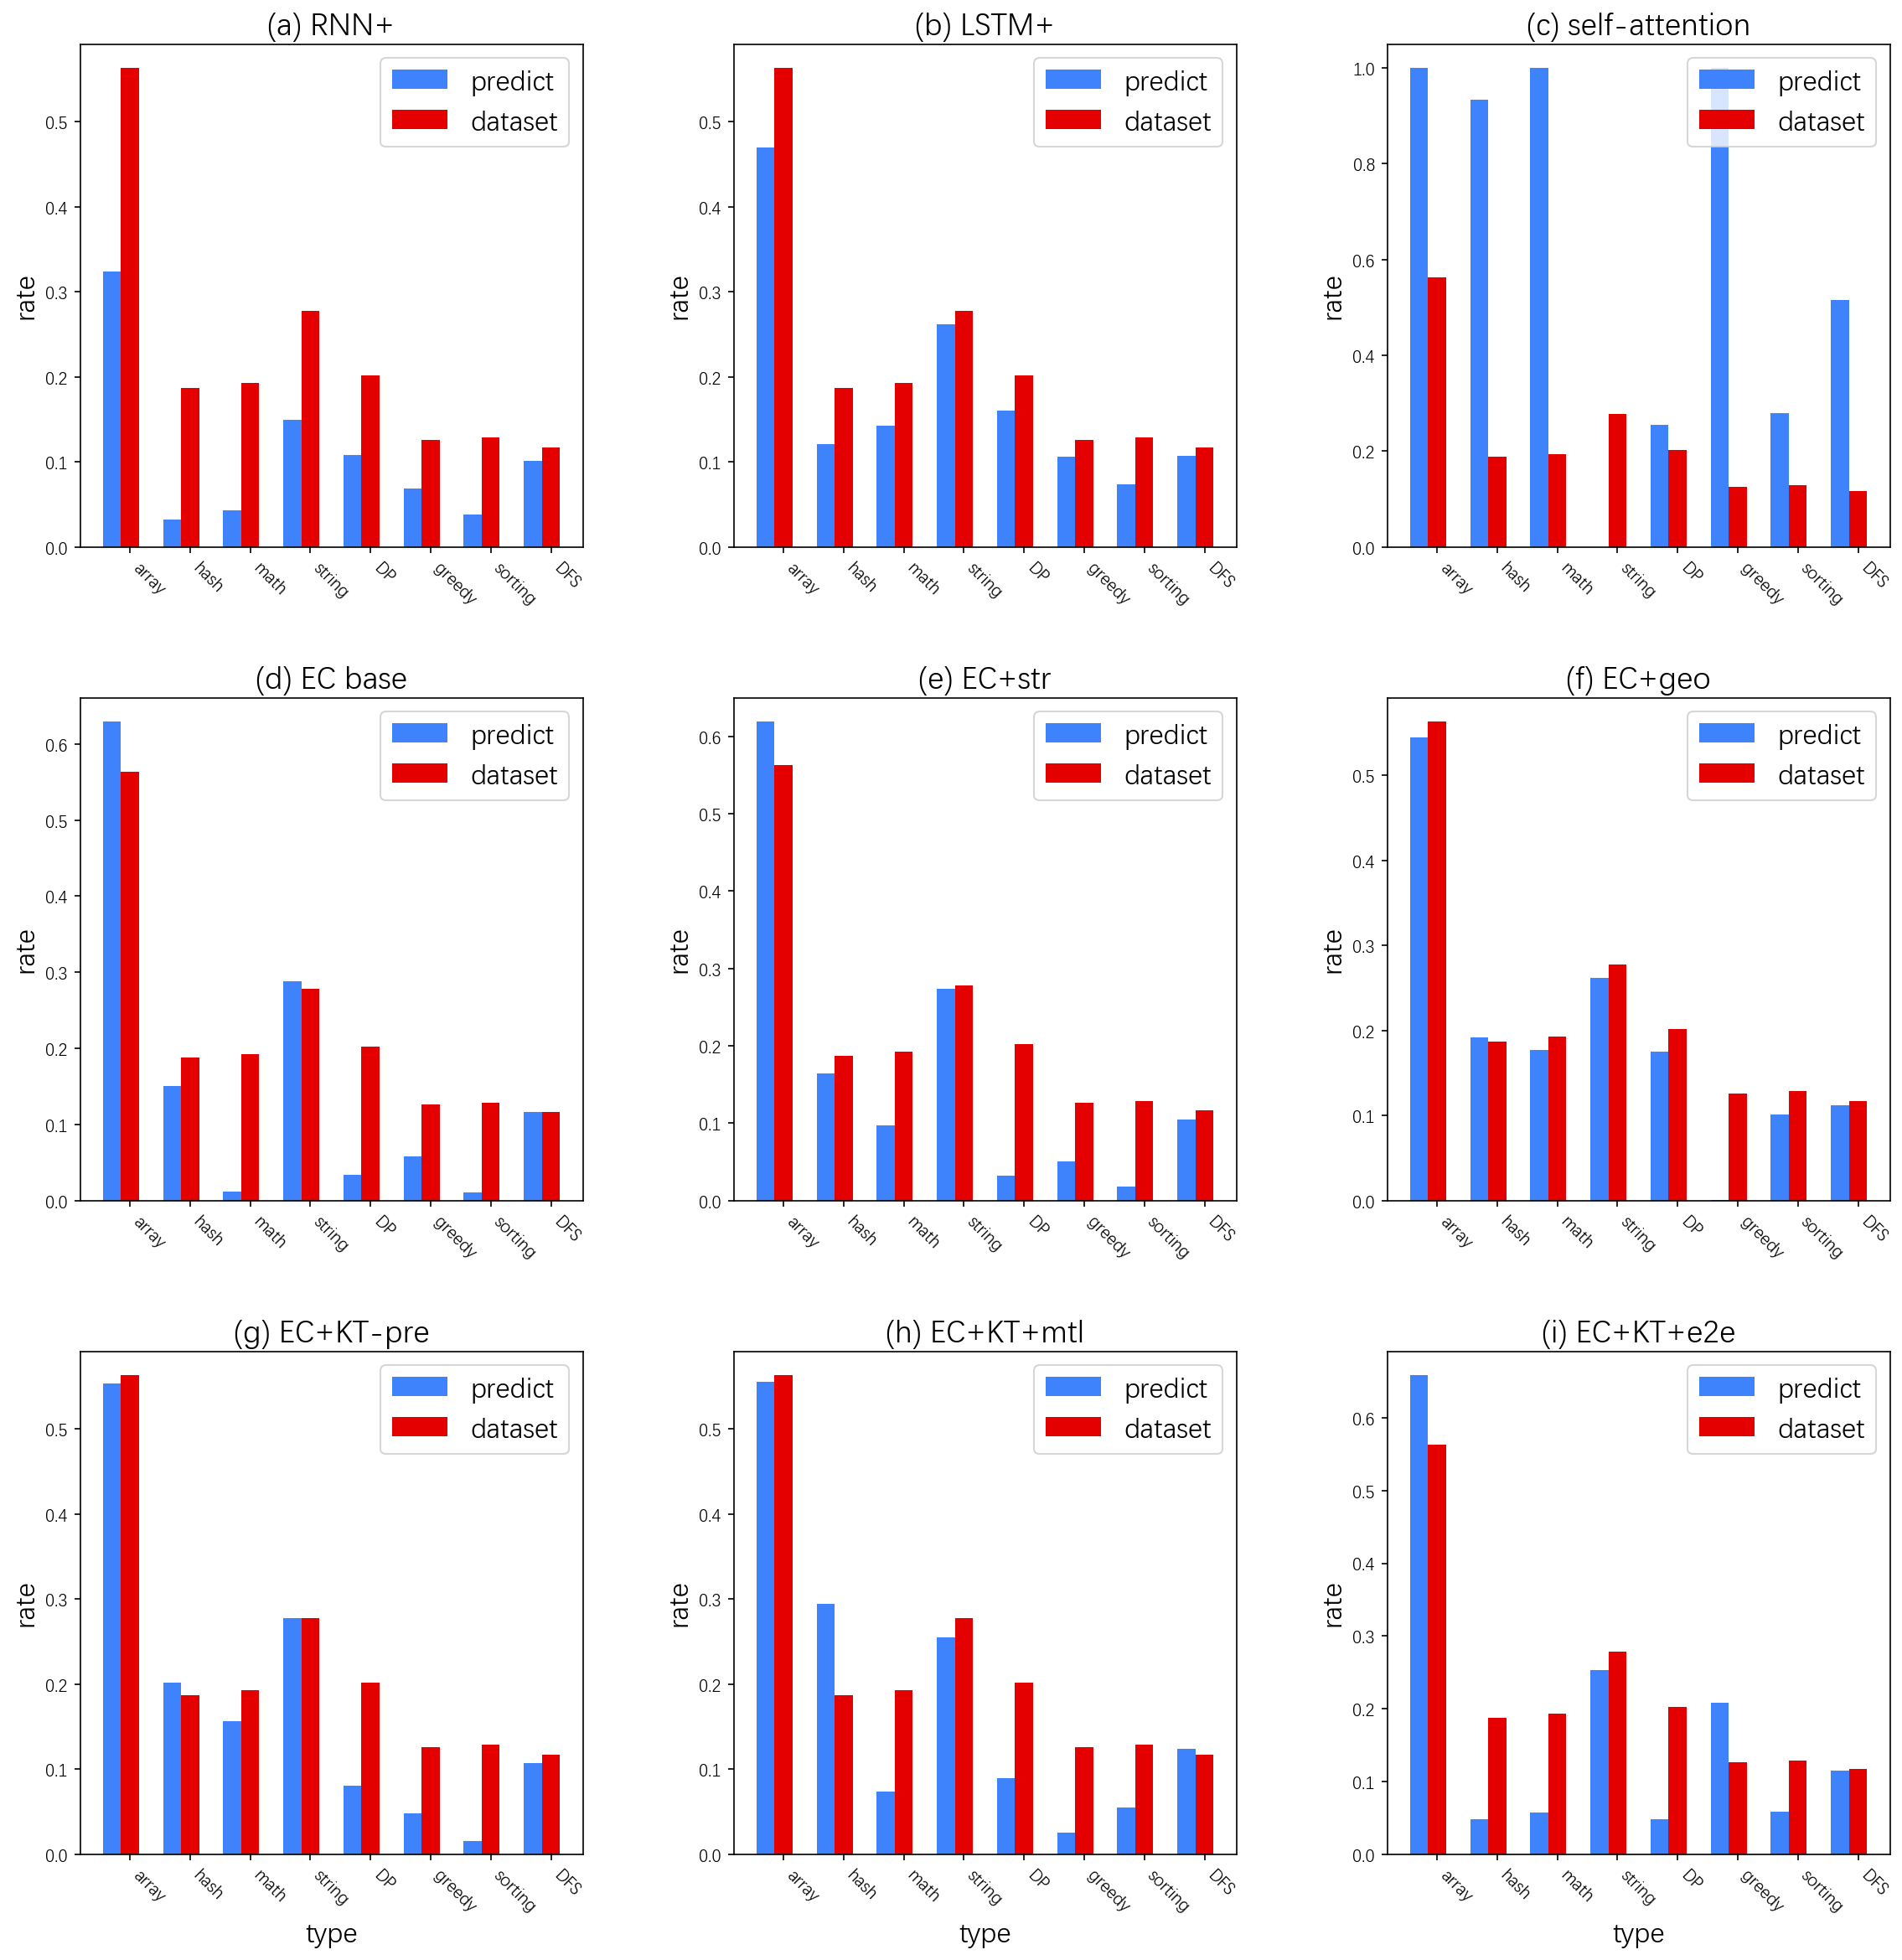

In [7]:
fig = plt.figure(num=1, figsize=(18, 18), dpi=150, clear=True)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, hspace=0.3, wspace=0.3)
bar_width = 0.3
x = np.arange(8)
c = ['dodger blue', 'red']

for i in range(9):
    axe = fig.add_subplot(3, 3, i + 1)
    axe.bar(x - 1 / 2 * bar_width, np.array(dist_lst[i]) / 1500, bar_width,
            color=seaborn.xkcd_rgb[c[0]], align="center", tick_label=name_lst, label='predict')
    axe.bar(x + 1/2 * bar_width, np.array(exer_glo) / 1500, bar_width,
            color=seaborn.xkcd_rgb[c[1]], align="center", tick_label=name_lst, label='dataset')
    axe.set_xticklabels(name_lst, rotation=-45, ha='left')
    axe.legend(loc='upper right', fontsize=16)
    if i > 5:
        axe.set_xlabel("type", fontsize=16)
    axe.set_ylabel("rate", fontsize=16)
    axe.set_title(ttl_lst2[i], fontsize=18)

plt.savefig('./results/cmp_ec/cmp_ec_dist.jpg')
plt.show()